# All about linear regression with python

In [102]:
# Toy dataset links from sklearn: https://scikit-learn.org/stable/datasets/index.html
from sklearn.datasets import load_boston
from sklearn.datasets import load_diabetes

# from sklearn.datasets import load_linnerud
import pandas as pd
import seaborn as sns
import numpy as np
%run pre_model_assumptions.ipynb

# loading first dataset from sklearn library
boston = load_boston()

X1 = pd.DataFrame(boston.data)
X1.columns = boston.feature_names
y1 = pd.DataFrame(boston.target)
y1.columns = ['MEDV']
#For now, we will merge the X and y to make one dataset and divide them again after we split them into training and validation!
df1 = X1.merge(y1, left_index=True, right_index=True)
# loading second dataset from sklearn library
diabetes = load_diabetes()
X2 = pd.DataFrame(diabetes.data)
X2.columns = diabetes.feature_names
y2 = pd.DataFrame(diabetes.target)
y2.columns = ['progression']
# For now, we will merge the X and y to make one dataset and divide them again after we split them into training and validation!
df2 = X2.merge(y2, left_index=True, right_index=True)

# generating a normal distribution to compare with the above data sets. This will generate a near perfect normal distribution with a mean of 0 and standard deviation of 5
df3 = np.random.normal(0, 5, 5000)
df3 = pd.DataFrame(df3)
df3.columns = ['target']

In [103]:
#!pip install import_ipynb

## Testing assumption 1: target is normally distributed

AndersonResult(statistic=11.822483502722775, critical_values=array([0.572, 0.651, 0.781, 0.911, 1.084]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


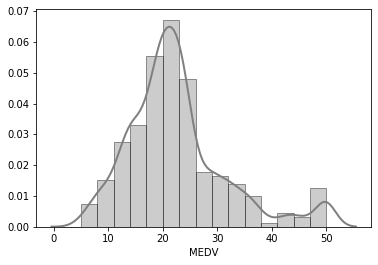

In [104]:
# dataset 1
target = 'MEDV'
stat_assumption = anderson_darling(df1, target)
print(stat_assumption)
# can also be tested by visual inspection
vis_assumption = plot_histogram(df1, target)

AndersonResult(statistic=6.83749552899053, critical_values=array([0.571, 0.65 , 0.78 , 0.91 , 1.082]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


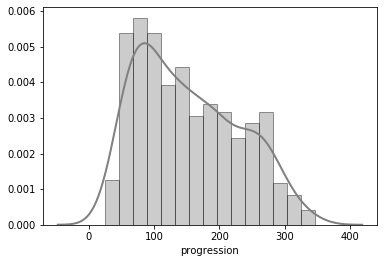

In [105]:
# dataset 2
target = 'progression'
stat_assumption = anderson_darling(df2, target)
print(stat_assumption)
# can also be tested by visual inspection
vis_assumption = plot_histogram(df2, target)

AndersonResult(statistic=0.36842426033035736, critical_values=array([0.576, 0.655, 0.786, 0.917, 1.091]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))


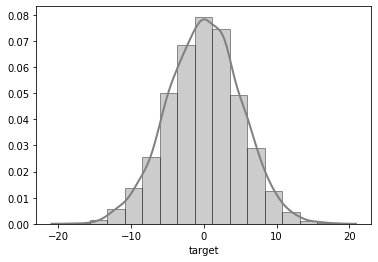

In [106]:
# dataset 3
target = 'target'
stat_assumption = anderson_darling(df3, target)
print(stat_assumption)
# can also be tested by visual inspection
vis_assumption = plot_histogram(df3, target)

## Testing assumption 2: the predictors or independent variables are not correlated with each other

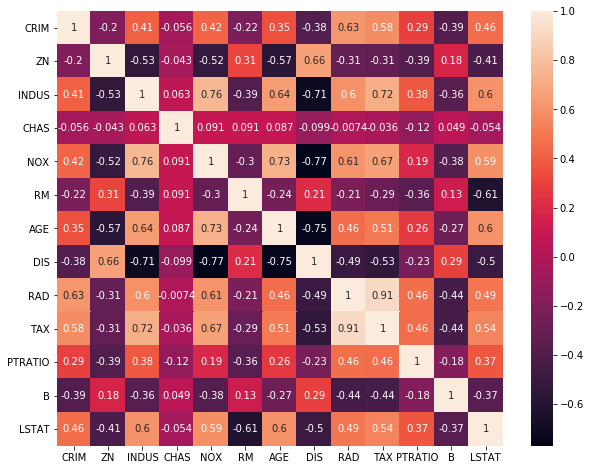

In [107]:
# dataset 1 
corr_matrix(X1)

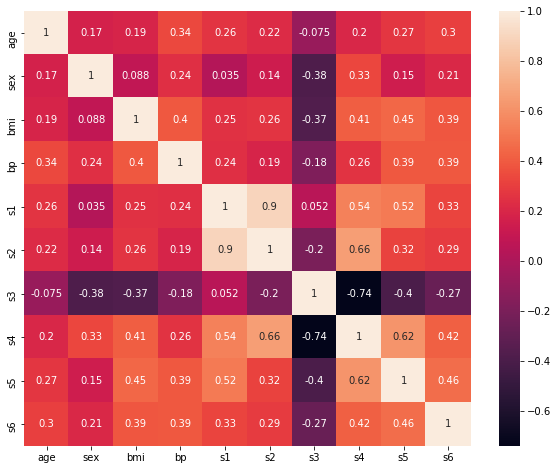

In [108]:
# dataset 2 
corr_matrix(X2)

## Testing assumption 3: Detecting multicollinearity using variance inflation factors


In [109]:
# dataset 1
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

vif = pd.DataFrame()
vif["features"] = X1_vif.columns
vif["VIF Factor"] = [variance_inflation_factor(X1_vif.values, i) for i in range(X1_vif.shape[1])]
vif

,features,VIF Factor
0,const,585.265238
1,CRIM,1.792192
2,ZN,2.298758
3,INDUS,3.991596
4,CHAS,1.073995
5,NOX,4.393720
6,RM,1.933744
7,AGE,3.100826
8,DIS,3.955945
9,RAD,7.484496


In [110]:
# dataset 2

X2_vif = add_constant(X2)
vif = pd.DataFrame()
vif["features"] = X2_vif.columns
vif["VIF Factor"] = [variance_inflation_factor(X2_vif.values, i) for i in range(X2_vif.shape[1])]
vif

,features,VIF Factor
0,const,1.000000
1,age,1.217307
2,sex,1.278073
3,bmi,1.509446
4,bp,1.459429
5,s1,59.203786
6,s2,39.194379
7,s3,15.402352
8,s4,8.890986
9,s5,10.076222


## Testing assumption 4: Linear relation between target and predictor

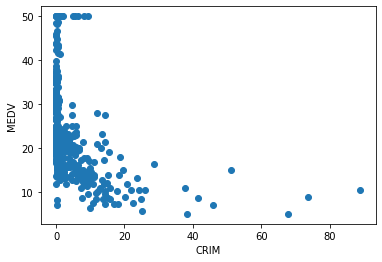

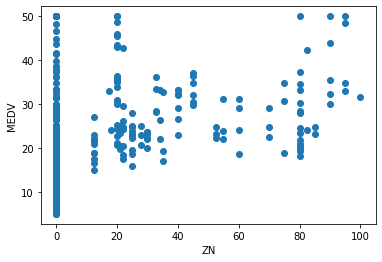

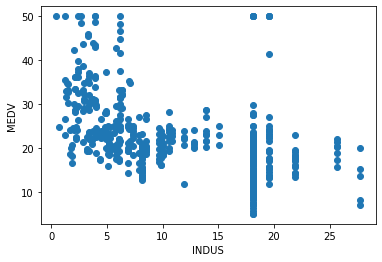

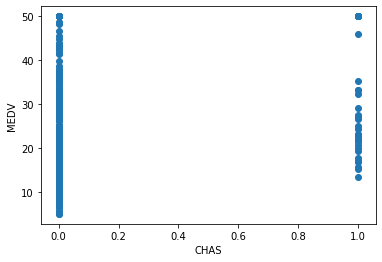

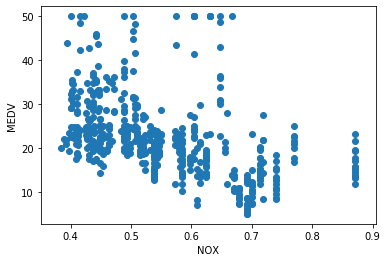

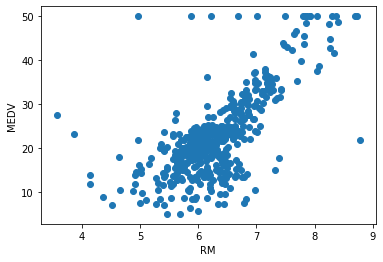

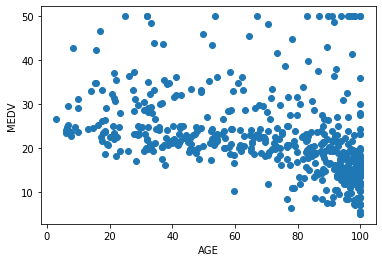

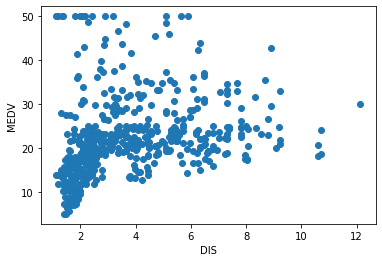

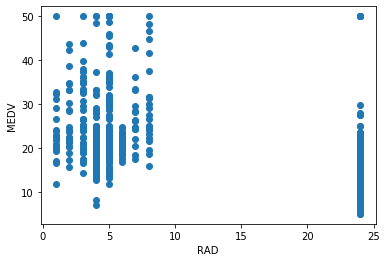

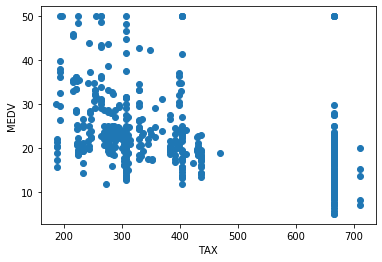

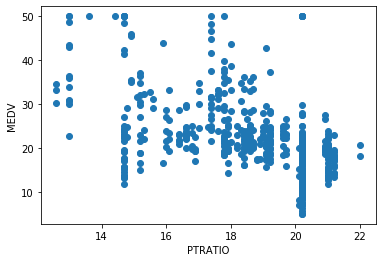

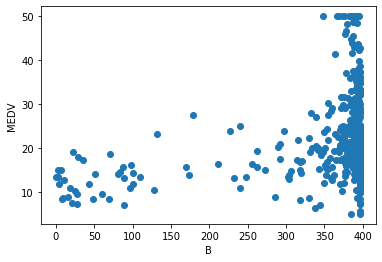

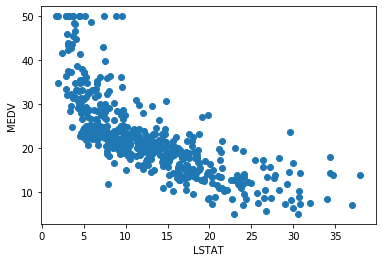

In [156]:
for i in range(0,len(df1.columns)-1):
    plt.scatter(df1.iloc[:, i], df1.iloc[:, -1])
    plt
    plt.xlabel(str(df1.columns[i]))
    plt.ylabel(df1.columns[-1])
    plt.show()

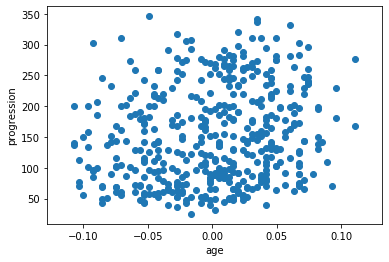

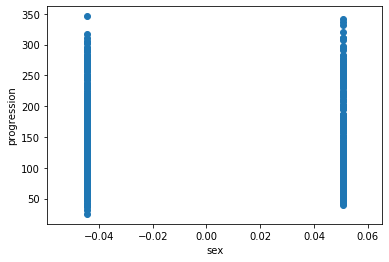

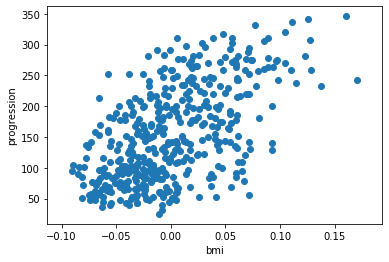

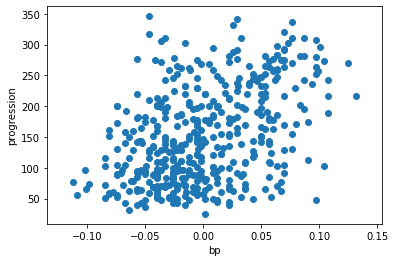

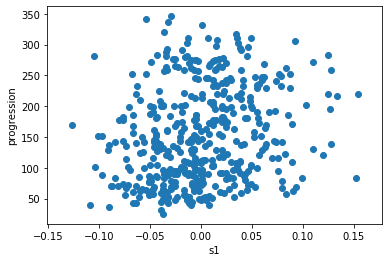

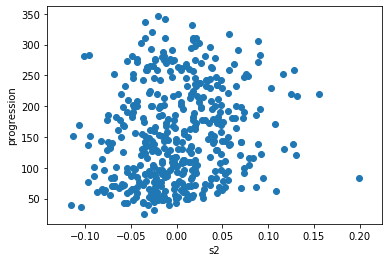

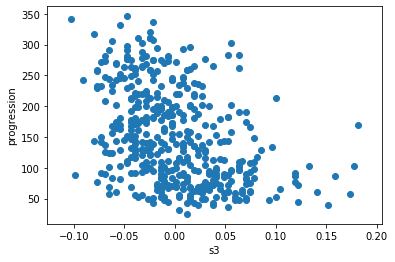

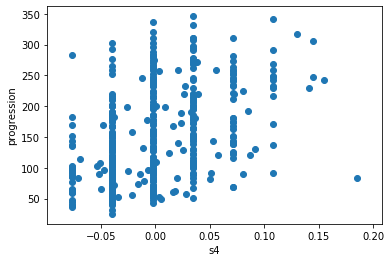

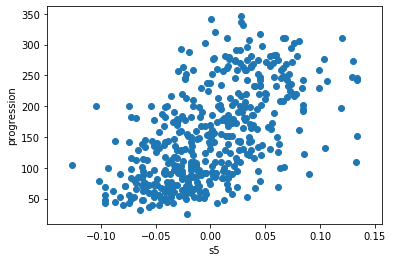

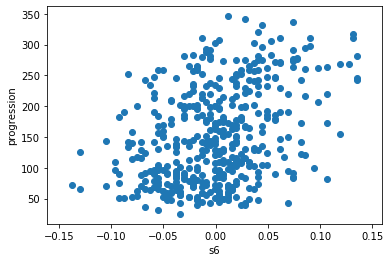

In [157]:
for i in range(0,len(df2.columns)-1):
    plt.scatter(df2.iloc[:, i], df2.iloc[:, -1])
    plt
    plt.xlabel(str(df2.columns[i]))
    plt.ylabel(df2.columns[-1])
    plt.show()